# 비비빅 학습동아리 14회차_스터디
 - 2024.10.29.(화) 18:00~20:30
 - 결정트리 원리, 시각화
 - 랜덤포레스트 원리, OOB(out of bag), 앙상블 -> 배깅,  
 - feature_importance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm           # 한글 폰트 깨짐방지 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['axes.unicode_minus'] = False     # 폰트 깨짐 방지를 위해 음수 기호 설정

# 결정트리 Decision Tree
1. 데이터 준비하기

In [32]:
# y = a * x + b
x = np.linspace(1,100,50)
y = x + np.random.normal(0,5,len(x))
y_ori = x

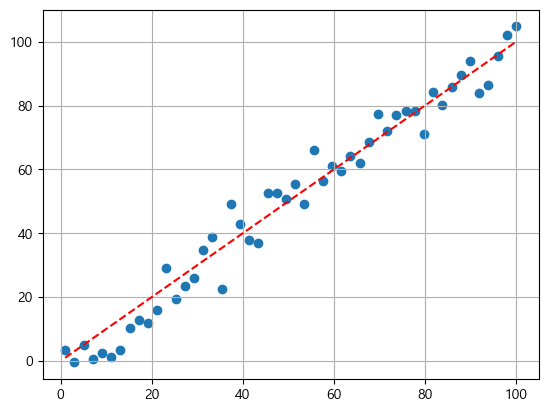

In [22]:
plt.scatter(x, y)
plt.plot   (x, y_ori, color= 'red', linestyle = '--')
plt.grid()

In [24]:
# 선형회귀
from sklearn.linear_model import LinearRegression
m1 = LinearRegression()

In [33]:
x

array([  1.        ,   3.02040816,   5.04081633,   7.06122449,
         9.08163265,  11.10204082,  13.12244898,  15.14285714,
        17.16326531,  19.18367347,  21.20408163,  23.2244898 ,
        25.24489796,  27.26530612,  29.28571429,  31.30612245,
        33.32653061,  35.34693878,  37.36734694,  39.3877551 ,
        41.40816327,  43.42857143,  45.44897959,  47.46938776,
        49.48979592,  51.51020408,  53.53061224,  55.55102041,
        57.57142857,  59.59183673,  61.6122449 ,  63.63265306,
        65.65306122,  67.67346939,  69.69387755,  71.71428571,
        73.73469388,  75.75510204,  77.7755102 ,  79.79591837,
        81.81632653,  83.83673469,  85.85714286,  87.87755102,
        89.89795918,  91.91836735,  93.93877551,  95.95918367,
        97.97959184, 100.        ])

In [34]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [30]:
m1.fit(x, y)
y_pred1 = m1.predict(x)

In [31]:
y_pred1

array([[-2.17126209e+00],
       [-5.26541069e-02],
       [ 2.06595388e+00],
       [ 4.18456186e+00],
       [ 6.30316984e+00],
       [ 8.42177783e+00],
       [ 1.05403858e+01],
       [ 1.26589938e+01],
       [ 1.47776018e+01],
       [ 1.68962098e+01],
       [ 1.90148177e+01],
       [ 2.11334257e+01],
       [ 2.32520337e+01],
       [ 2.53706417e+01],
       [ 2.74892497e+01],
       [ 2.96078577e+01],
       [ 3.17264656e+01],
       [ 3.38450736e+01],
       [ 3.59636816e+01],
       [ 3.80822896e+01],
       [ 4.02008976e+01],
       [ 4.23195056e+01],
       [ 4.44381135e+01],
       [ 4.65567215e+01],
       [ 4.86753295e+01],
       [ 5.07939375e+01],
       [ 5.29125455e+01],
       [ 5.50311535e+01],
       [ 5.71497614e+01],
       [ 5.92683694e+01],
       [ 6.13869774e+01],
       [ 6.35055854e+01],
       [ 6.56241934e+01],
       [ 6.77428014e+01],
       [ 6.98614094e+01],
       [ 7.19800173e+01],
       [ 7.40986253e+01],
       [ 7.62172333e+01],
       [ 7.8

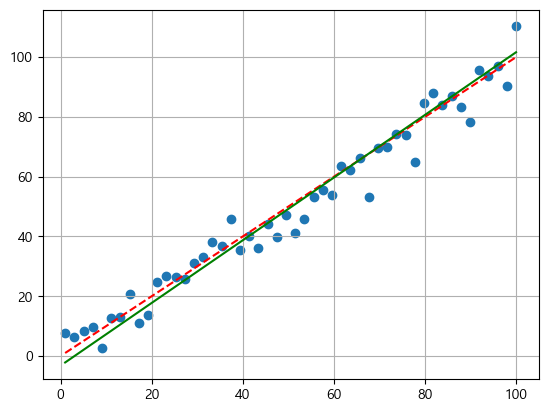

In [44]:
plt.scatter(x, y)
plt.plot   (x, y_ori, color= 'red', linestyle = '--')
plt.plot   (x, y_pred1, color= 'green', linestyle = '-')
plt.grid()

# 결정트리 decision tree

In [48]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [54]:
m2 = DecisionTreeRegressor()
m2.fit(x,y)

DecisionTreeRegressor()

In [55]:
y_pred2 = m2.predict(x)

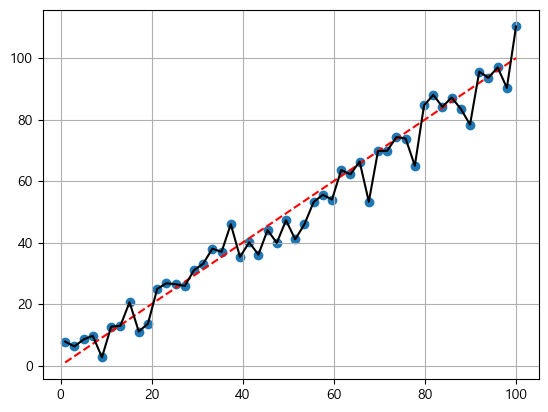

In [61]:
plt.scatter(x, y)
plt.plot   (x, y_ori, color= 'red', linestyle = '--')
#plt.plot   (x, y_pred1, color= 'green', linestyle = '-')
plt.plot   (x, y_pred2, color= 'black', linestyle = '-')
plt.grid()

In [63]:
y.reshape(1,-1) == y_pred2.reshape(1,-1)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True]])

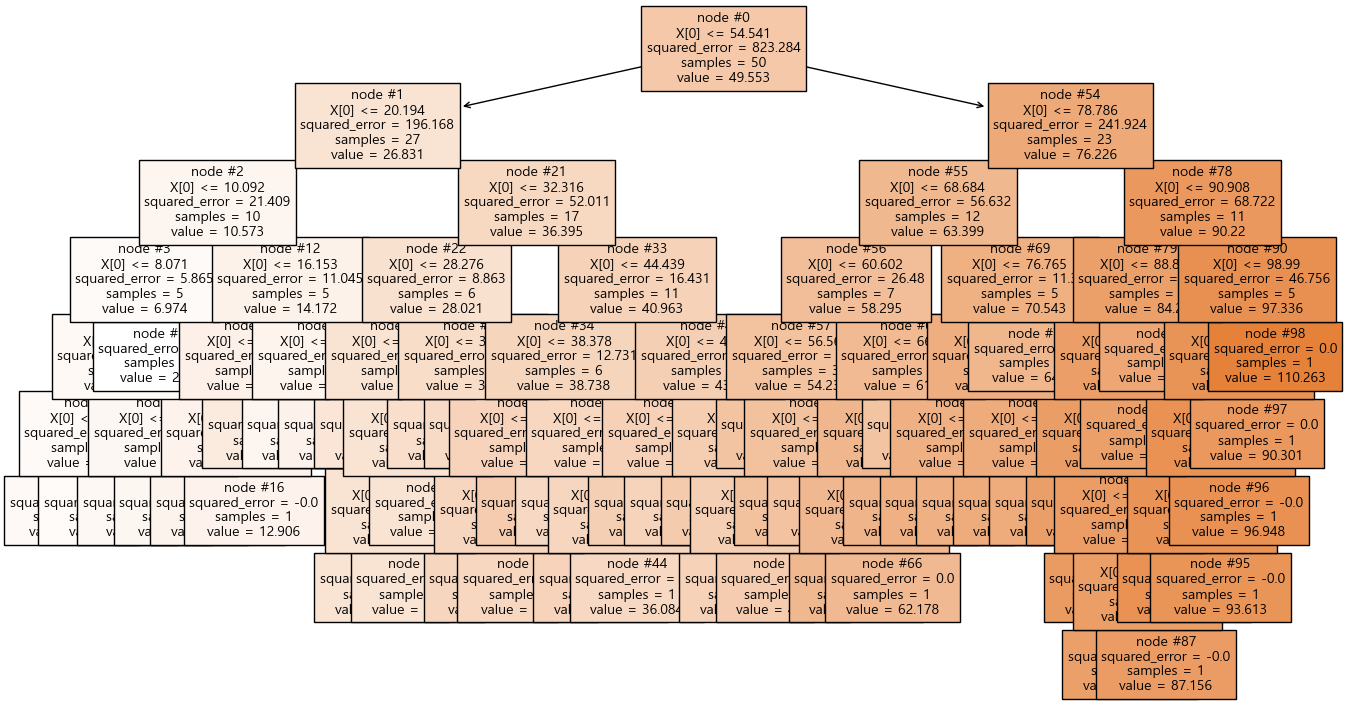

In [66]:
plt.figure(figsize=(16,9))
plot_tree(m2, filled=True, impurity=True, node_ids=True, fontsize=10)
plt.show()

In [86]:
m3 = DecisionTreeRegressor(max_depth=2)
m3.fit(x,y)

DecisionTreeRegressor(max_depth=2)

In [87]:
y_pred3 = m3.predict(x)

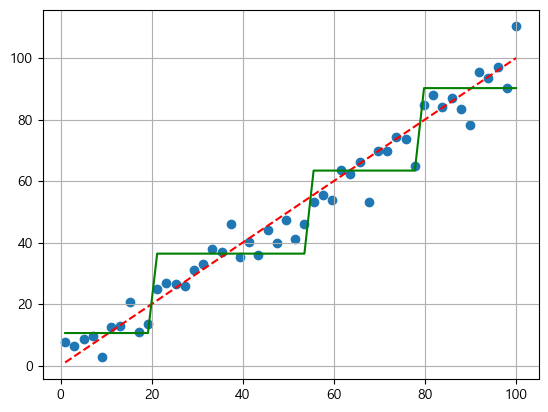

In [88]:
plt.scatter(x, y)
plt.plot   (x, y_ori, color= 'red', linestyle = '--')
plt.plot   (x, y_pred3, color= 'green', linestyle = '-')
plt.grid()

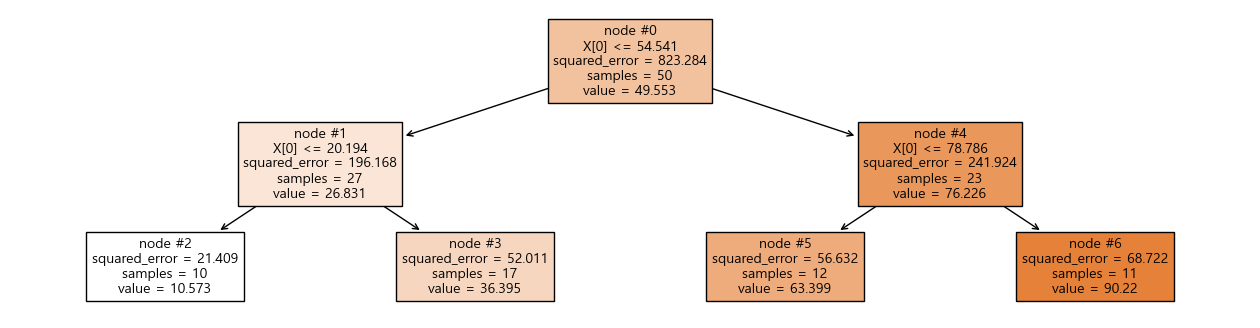

In [89]:
plt.figure(figsize=(16,4))
plot_tree(m3, filled=True, impurity=True, node_ids=True, fontsize=10)
plt.show()

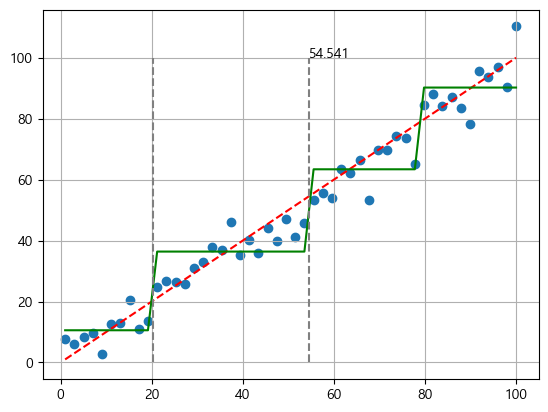

In [93]:
plt.scatter(x, y)
plt.plot   (x, y_ori, color= 'red', linestyle = '--')
plt.plot   (x, y_pred3, color= 'green', linestyle = '-')
# 노드의 분류기준을 표시
plt.vlines(x=54.541, ymin=0, ymax=100, colors='gray', linestyles='--')
plt.vlines(x=20.194, ymin=0, ymax=100, colors='gray', linestyles='--')
#plt.vlines(x=10.573, ymin=0, ymax=100, colors='gray', linestyles='--')
plt.text(y=100, x=54.543, s='54.541')
plt.grid()

In [94]:
y_pred3

array([10.57274391, 10.57274391, 10.57274391, 10.57274391, 10.57274391,
       10.57274391, 10.57274391, 10.57274391, 10.57274391, 10.57274391,
       36.39485493, 36.39485493, 36.39485493, 36.39485493, 36.39485493,
       36.39485493, 36.39485493, 36.39485493, 36.39485493, 36.39485493,
       36.39485493, 36.39485493, 36.39485493, 36.39485493, 36.39485493,
       36.39485493, 36.39485493, 63.39864388, 63.39864388, 63.39864388,
       63.39864388, 63.39864388, 63.39864388, 63.39864388, 63.39864388,
       63.39864388, 63.39864388, 63.39864388, 63.39864388, 90.22020744,
       90.22020744, 90.22020744, 90.22020744, 90.22020744, 90.22020744,
       90.22020744, 90.22020744, 90.22020744, 90.22020744, 90.22020744])

### x의 범위가 더 늘어났을 때 ( 훈련데이터에 포함되지 않은 테스트 데이터)

In [105]:
# y = a * x + b
more_x = np.linspace(-100,200,50).reshape(-1,1)
more_y_ori = more_x
more_y = more_x + np.random.normal(0,5,len(more_x)).reshape(-1,1)
more_y_ori = more_x

In [101]:
more_y_pred1 = m1.predict(more_x)

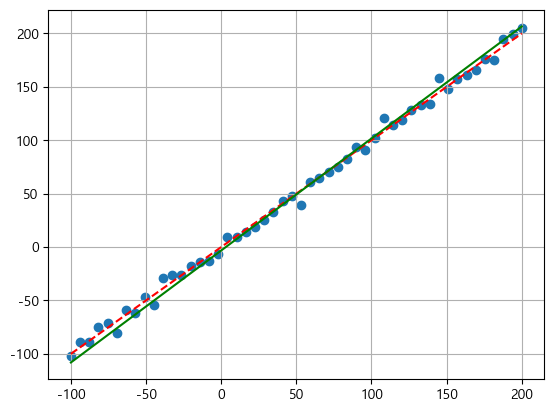

In [106]:
plt.scatter(more_x, more_y)
plt.plot   (more_x, more_y_ori, color= 'red', linestyle = '--')
plt.plot   (more_x, more_y_pred1, color= 'green', linestyle = '-')
plt.grid()

In [107]:
#y_pred2 = m2.predict(x) # 0~100
more_y_pred2 = m2.predict(more_x) # -100 ~ 200

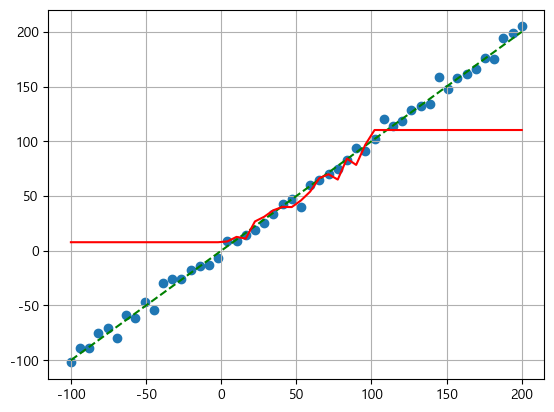

In [109]:
plt.scatter(more_x, more_y)
plt.plot   (more_x, more_y_ori, color= 'green', linestyle = '--')
plt.plot   (more_x, more_y_pred2, color= 'red', linestyle = '-')
plt.grid()

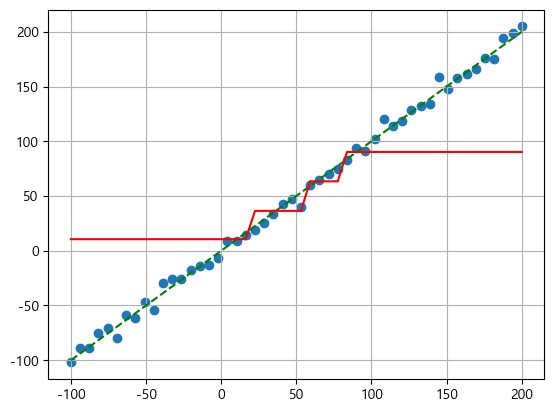

In [110]:
more_y_pred3 = m3.predict(more_x) # -100 ~ 200
plt.scatter(more_x, more_y)
plt.plot   (more_x, more_y_ori, color= 'green', linestyle = '--')
plt.plot   (more_x, more_y_pred3, color= 'red', linestyle = '-')
plt.grid()

# 랜덤포레스트

In [112]:
from sklearn.ensemble import RandomForestRegressor
m4 = RandomForestRegressor()

In [124]:
m4.fit(x, y.ravel())

RandomForestRegressor()

In [126]:
y_pred4 = m4.predict(x)

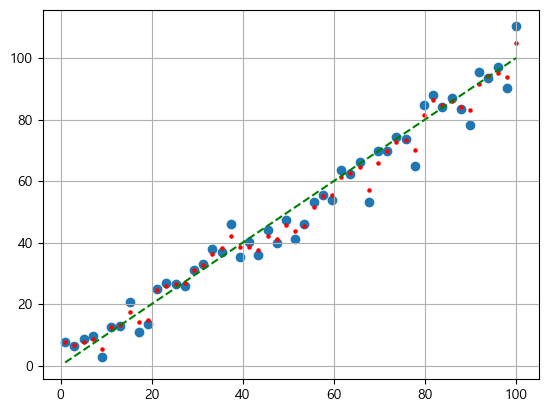

In [132]:
plt.scatter(x, y)
plt.plot   (x, y_ori, color= 'green', linestyle = '--')
plt.scatter(x, y_pred4, color= 'red', linestyle = '-', s=5)
plt.grid()

In [133]:
more_y_pred4 = m4.predict(more_x)

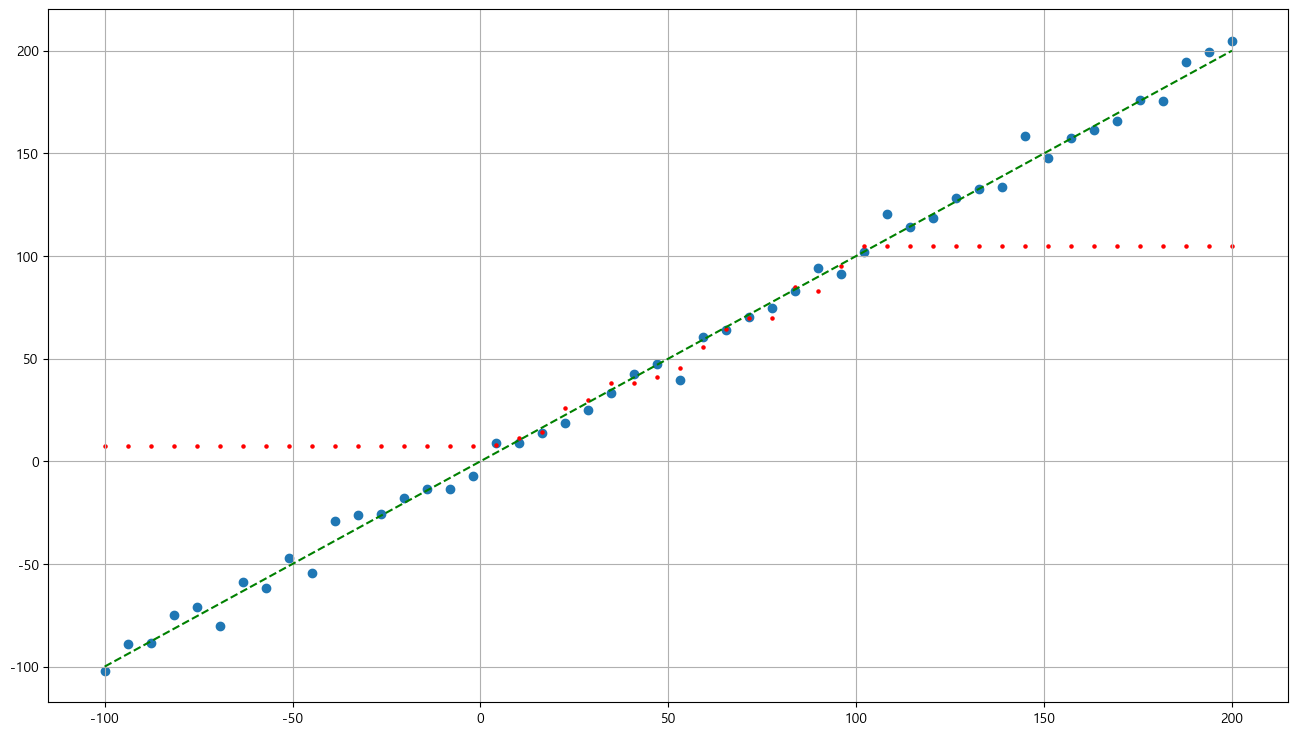

In [137]:
#more_y_pred3 = m3.predict(more_x) # -100 ~ 200
plt.figure(figsize=(16,9))
plt.scatter(more_x, more_y)
plt.plot   (more_x, more_y_ori, color= 'green', linestyle = '--')
plt.scatter   (more_x, more_y_pred4, color= 'red', linestyle = '-', s=5)
plt.grid()

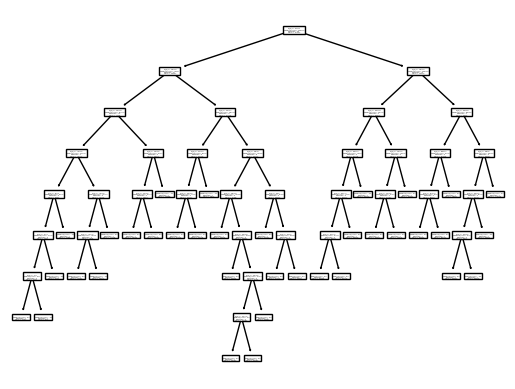

In [145]:
_ = plot_tree(m4.estimators_[0])

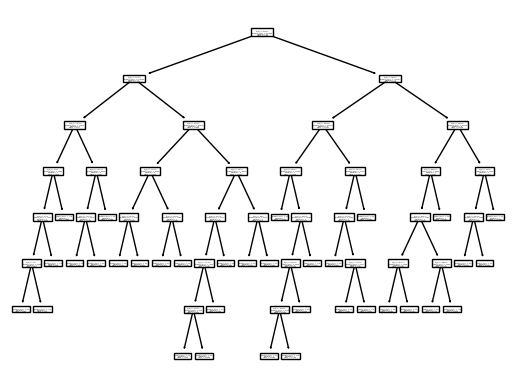

In [146]:
_ = plot_tree(m4.estimators_[1])

In [163]:
m4.estimators_[9].random_state

1624575965

In [170]:
n_samples = len(x)
random_state = np.random.RandomState(m4.estimators_[0].random_state)
sample_list = random_state.choice(n_samples, n_samples, replace=True)

In [171]:
len(sample_list), sample_list

(50,
 array([47, 44, 44, 24, 19, 26, 13, 14, 22, 38, 38, 31,  1, 23,  4, 20, 11,
        12, 30, 48, 37, 30, 16,  7, 35, 30, 45, 32, 33, 38, 25, 45, 24, 41,
        18,  3, 12, 18, 35, 38, 15, 12,  5, 48, 39,  0, 49,  8, 12, 31]))

In [172]:
len(set(sample_list))

35

In [158]:
34/50

0.68

### 부트스트랩 샘플링 시각화

In [ ]:
n_samples = len(x)
random_state = np.random.RandomState(m4.estimators_[1].random_state)
sample_list = random_state.choice(n_samples, n_samples, replace=True)

In [ ]:
sample_list, len(set(sample_list)) # 이 예시에서 1은 4회 추출됨.

(array([17,  2, 35, 31, 29, 26, 38, 49, 20, 29, 47, 13,  1, 31,  9, 11, 46,
         5, 14, 49, 16,  0, 42, 40, 11,  1, 47, 25, 41,  5, 37, 20,  1,  3,
        10,  3, 43, 11, 19, 31, 15,  9, 38, 16, 40,  1, 37, 28,  8,  6]),
 32)

In [ ]:
sample_x = x[sample_list]
sample_y = y[sample_list]

In [ ]:
len(np.unique(sample_x)), len(np.unique(sample_y))

(32, 32)

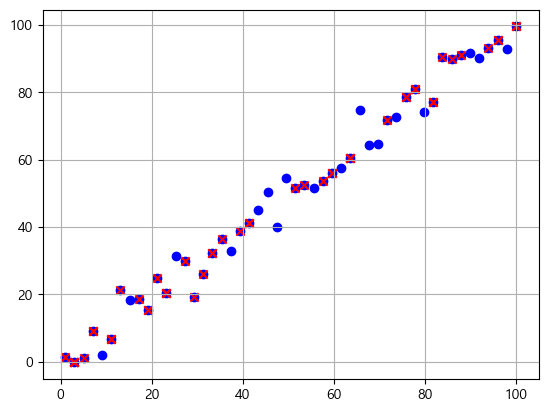

In [ ]:
plt.scatter(x,               y, color='blue')
plt.scatter(sample_x, sample_y, color='red',  marker='x')
plt.grid()